# Working on Ni-superalloy data

**Data:** Thermocalc Simulation data from Ni-based superalloys 
(https://en.wikipedia.org/wiki/Superalloy#Ni-based_superalloy_phases)

**Task:** To predict the Gamma Prime phase fraction in the alloy resulting from the combination of the various input parameters.



**1. Import and Analyze data**

   1.1 Import data
   
   1.2 Data visualization
      - Histograms
      - Box plots

**2. Make changes in data**

   2.1 Data Cleaning
     - Remove Outliers

   2.2 Modify the data for Supervised learning task

   2.3 Standerdising the Input variables

   2.4 Splitting Data for Trining and Testing

**3. Define Model Evaluation strategies**
   - Function to evaluate the model performacne

**4. Machine Learning Algorithms**
   - Builtding model, Fitting training data, model evaluation, 
   - Hyper parameter optimization
   - Understanding feature importance 
   
   4.1 Linear Regression
   
   4.2 Feed forward feature selection in Linear models
   
   4.3 Decision Tree
   
   4.4 Random forest
   
   4.5 Gradient Boosting
   
   4.6 Multi Layer perceptron
   
   4.7 Neurla Networks Keras

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

## 1. Import and Analyze data

### 1.1 Import Data

In [3]:
df = pd.read_excel('Ni-superalloys-data_mod.xlsx',index_col=0)

In [4]:
df.head()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,...,Mo_var,Ru_var,Ta_var,W_var,Re_var,T,P_TCAPI_GammaPrimePhaseFractionMain_value,P_TCAPI_SolidusTemperatureMain_value,P_TCAPI_LiquidusTemperatureMain_value,P_TCAPI_Density_CaronMain_value
0,0.030004,0.034982,0.060390,0.179354,0.004069,0.070098,0.033860,0.018508,0.070210,0.002396,...,0.000191,0.001678,0.004871,0.004565,0.004747,1274.450089,30.776242,1329.063527,1390.850579,8687.461852
1,0.030007,0.033043,0.049549,0.152138,0.045881,0.041942,0.024419,0.063190,0.013271,0.003000,...,0.001000,0.002000,0.002000,0.002000,0.001000,1188.879240,38.051605,1331.448294,1378.137130,8616.105462
2,0.030010,0.025279,0.042238,0.048914,0.086289,0.023597,0.064696,0.023875,0.052492,0.001978,...,0.001181,0.002562,0.003372,0.004824,0.003075,1231.177894,38.014655,1330.248589,1377.186752,8915.481419
3,0.030010,0.028758,0.117597,0.129213,0.013396,0.081975,0.043861,0.105330,0.004558,0.002228,...,0.001827,0.002841,0.002321,0.003077,0.002766,1295.155371,34.460291,1257.819936,1338.662203,8873.510816
4,0.030011,0.055962,0.022606,0.096740,0.089257,0.016347,0.025636,0.030560,0.041867,0.002470,...,0.002601,0.001075,0.003116,0.001902,0.003975,1375.811214,35.945177,1295.418620,1349.375554,8611.575596


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57626 entries, 0 to 57625
Data columns (total 23 columns):
Al                                           57626 non-null float64
Ti                                           57626 non-null float64
Cr                                           57626 non-null float64
Co                                           57626 non-null float64
Mo                                           57626 non-null float64
Ru                                           57626 non-null float64
Ta                                           57626 non-null float64
W                                            57626 non-null float64
Re                                           57626 non-null float64
Al_var                                       57626 non-null float64
Ti_var                                       57626 non-null float64
Cr_var                                       57626 non-null float64
Co_var                                       57626 non-null float64
Mo_var 

1. No missing values
2. All are numerical values
3. Seems like a good data

In [6]:
df.describe()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,...,Mo_var,Ru_var,Ta_var,W_var,Re_var,T,P_TCAPI_GammaPrimePhaseFractionMain_value,P_TCAPI_SolidusTemperatureMain_value,P_TCAPI_LiquidusTemperatureMain_value,P_TCAPI_Density_CaronMain_value
count,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,...,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000,57626.000000
mean,0.052061,0.025122,0.055495,0.114265,0.038329,0.028287,0.049494,0.045654,0.047730,0.001674,...,0.002165,0.001853,0.002687,0.002666,0.002666,1395.990464,52.454443,1445.782267,1500.845939,9434.747189
std,0.045135,0.030517,0.062710,0.121861,0.046740,0.037486,0.056196,0.056094,0.060407,0.001824,...,0.002364,0.002364,0.002974,0.002973,0.002962,1151.365402,45.660877,1187.747586,1231.889356,7742.036847
min,0.030004,0.000002,0.000002,0.000010,0.000000,0.000000,0.000001,0.000001,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1173.156104,30.000251,1200.024124,1263.869019,8000.127913
25%,0.039625,0.010876,0.025157,0.058565,0.014302,0.006320,0.021653,0.017479,0.017998,0.000856,...,0.001000,0.000542,0.001246,0.001232,0.001235,1226.771021,38.613299,1298.681375,1356.035016,8459.807687
50%,0.047311,0.020770,0.049434,0.107941,0.030517,0.022498,0.043174,0.037361,0.038078,0.001569,...,0.002000,0.001708,0.002410,0.002374,0.002384,1280.561420,47.289817,1331.280340,1378.674358,8669.294302
75%,0.055705,0.031799,0.075760,0.154196,0.052548,0.042088,0.068051,0.063436,0.064901,0.002238,...,0.003000,0.002812,0.003707,0.003670,0.003658,1332.798427,57.074071,1359.680741,1400.249342,8877.852301
max,0.699200,0.684730,1.444030,1.997810,1.137020,0.956040,1.425970,1.280590,1.474550,0.030000,...,0.039990,0.039860,0.049770,0.049830,0.050000,14538.500950,749.568860,14271.389380,14632.340680,91929.786530


### 1.2 Data visualization

#### Histograms

Al


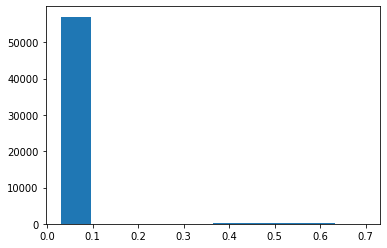

Ti


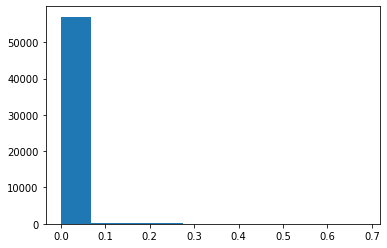

Cr


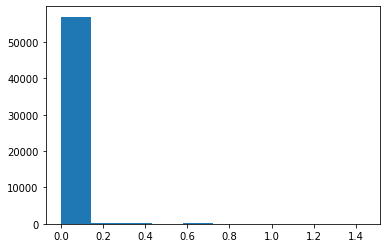

Co


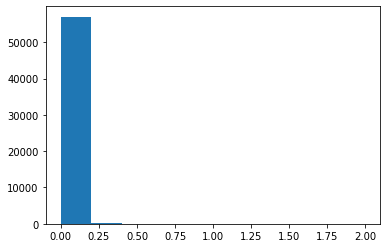

Mo


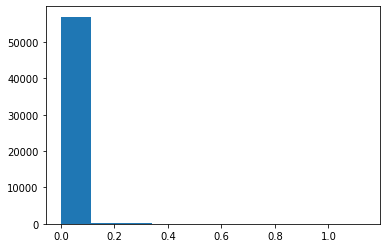

Ru


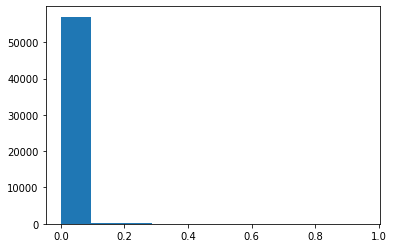

Ta


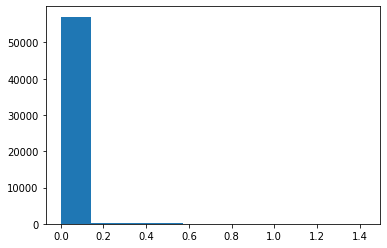

W


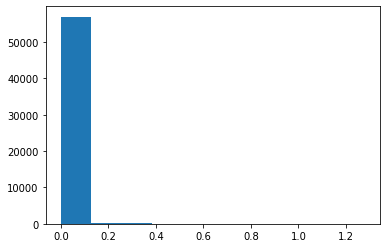

Re


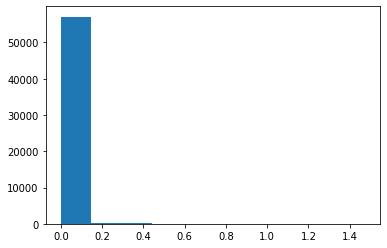

Al_var


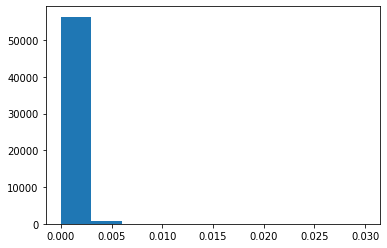

Ti_var


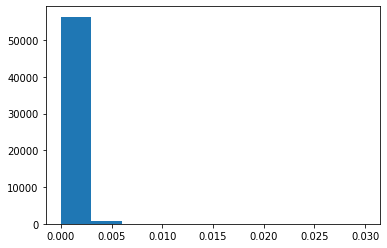

Cr_var


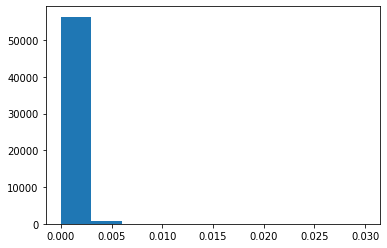

Co_var


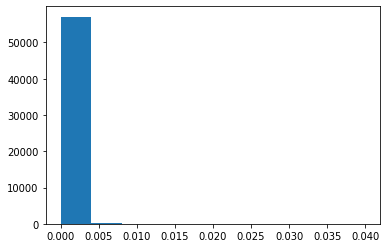

Mo_var


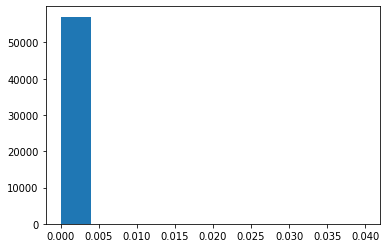

Ru_var


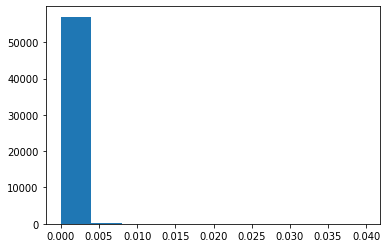

Ta_var


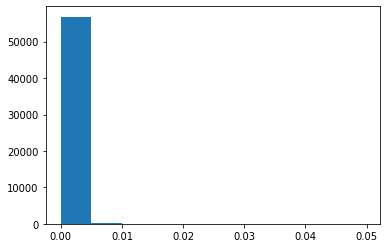

W_var


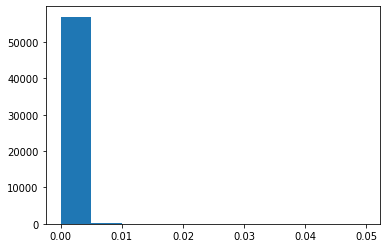

Re_var


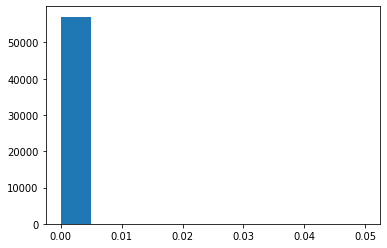

T


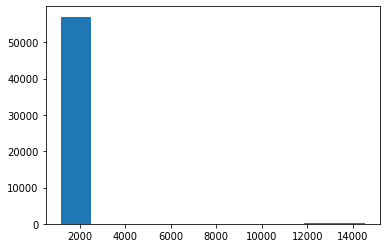

P_TCAPI_GammaPrimePhaseFractionMain_value


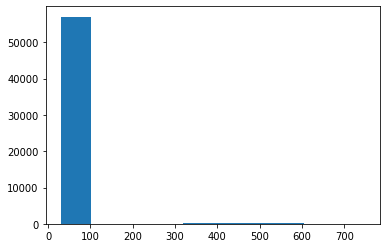

P_TCAPI_SolidusTemperatureMain_value


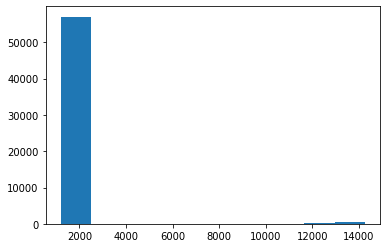

P_TCAPI_LiquidusTemperatureMain_value


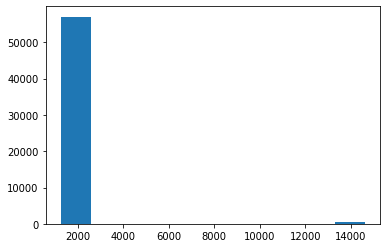

P_TCAPI_Density_CaronMain_value


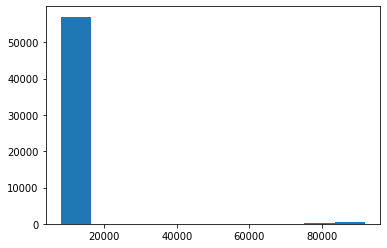

In [7]:
for col_name in df.columns:
    print(col_name)
    plt.hist(df[col_name],bins=10)
    plt.show()

#### Outliers in almost all data

In [8]:
import seaborn as sns

Al


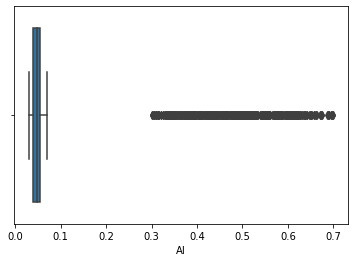

Ti


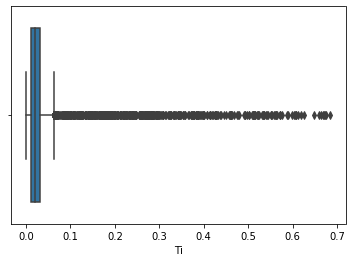

Cr


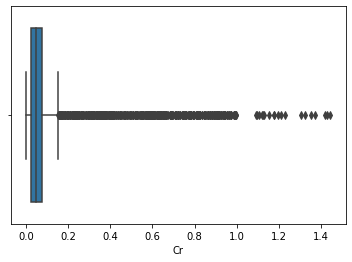

Co


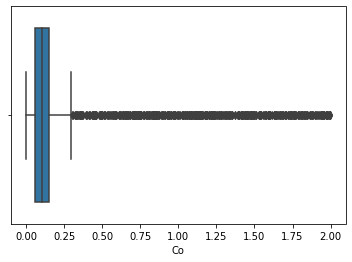

Mo


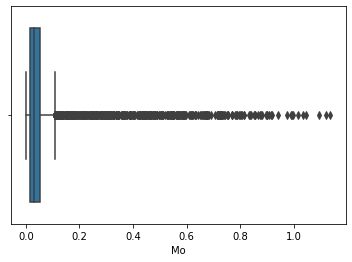

Ru


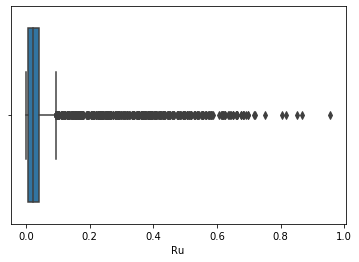

Ta


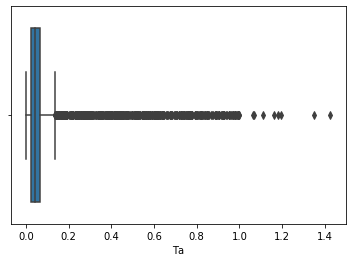

W


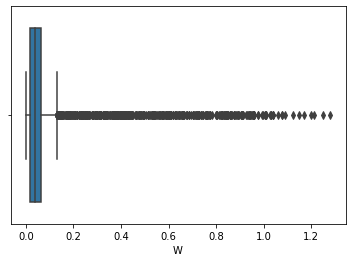

Re


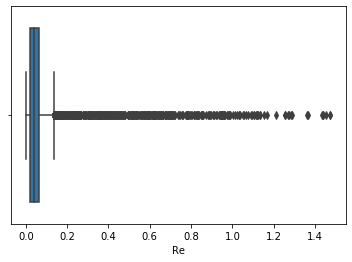

Al_var


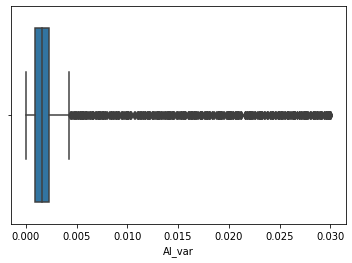

Ti_var


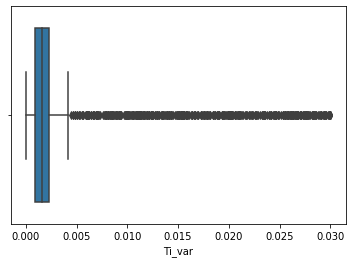

Cr_var


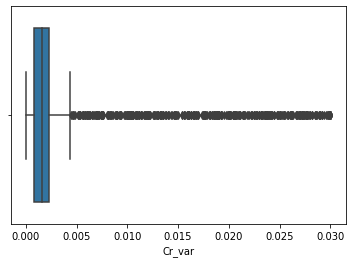

Co_var


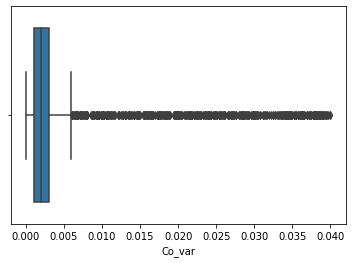

Mo_var


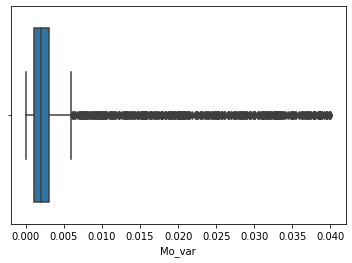

Ru_var


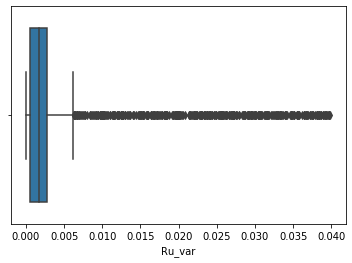

Ta_var


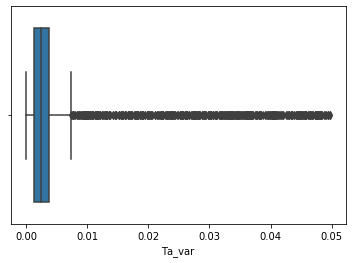

W_var


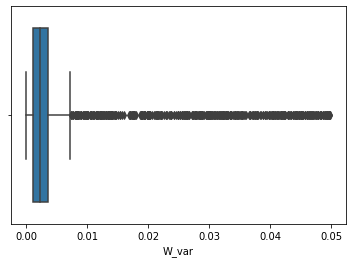

Re_var


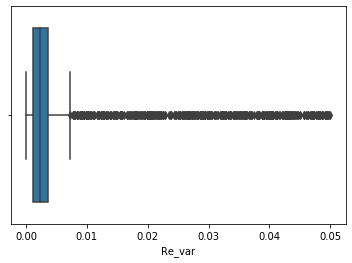

T


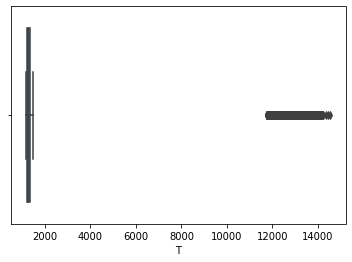

P_TCAPI_GammaPrimePhaseFractionMain_value


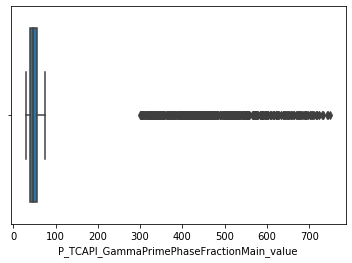

P_TCAPI_SolidusTemperatureMain_value


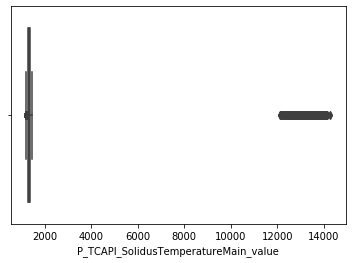

P_TCAPI_LiquidusTemperatureMain_value


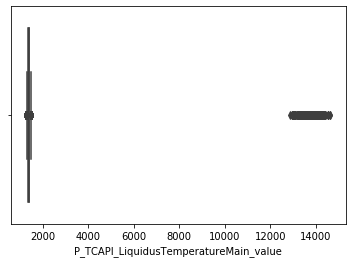

P_TCAPI_Density_CaronMain_value


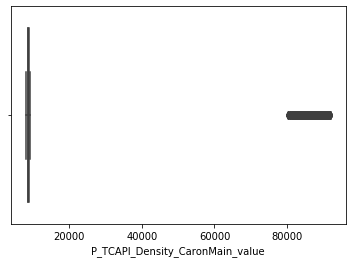

In [9]:
for col_name in df.columns:
    print(col_name)
    sns.boxplot(df[col_name])
    plt.show()

## 2. Making changes in Data

### 2.1 Data Cleaning

####  Remove outliers
Removing data outside inter-quartile range
1. Calculate the value of 25% quantile (Q1) and 75 % quantile(Q3)
2. Calculate the inter quantile range IQR = Q3-Q1
3. Calculate upper bound value = Q1-1.5*IQR
4. Calculate lower bound value = Q3+1.5*IQR
5. Iterate over all columns and siign np.NaN to all values ouside the range
6. Remove NaN values in dataFrame
    

In [16]:
# step 1
quantile_df = df.quantile(q=[0.25, 0.75]).T
quantile_df.columns = ['Q1', 'Q3']
# step 2
quantile_df['IQR'] = quantile_df['Q3']-quantile_df['Q1']
# step 3
quantile_df['Lower_Bound'] = quantile_df['Q1']-1.5*quantile_df['IQR']
# step 4
quantile_df['Upper_Bound'] = quantile_df['Q3']+1.5*quantile_df['IQR']

In [17]:
quantile_df 

,Q1,Q3,IQR,Lower_Bound,Upper_Bound
Al,0.039625,0.055705,0.016080,0.015505,0.079826
Ti,0.010876,0.031799,0.020923,-0.020508,0.063183
Cr,0.025157,0.075760,0.050603,-0.050747,0.151664
Co,0.058565,0.154196,0.095631,-0.084881,0.297642
Mo,0.014302,0.052548,0.038246,-0.043068,0.109918
Ru,0.006320,0.042088,0.035768,-0.047331,0.095740
Ta,0.021653,0.068051,0.046397,-0.047942,0.137647
W,0.017479,0.063436,0.045957,-0.051457,0.132372
Re,0.017998,0.064901,0.046903,-0.052356,0.135254
Al_var,0.000856,0.002238,0.001382,-0.001217,0.004311


In [75]:
for col in df.columns:
    is_below_lower_bound = df[col]<quantile_df.loc[col,'Lower_Bound']
    is_above_upper_bound = df[col]>quantile_df.loc[col,'Upper_Bound']
    #step 5
    df.loc[is_below_lower_bound | is_above_upper_bound ,col] = np.NaN
    #step 6
    df.dropna(inplace=True)

#### View Modified Data

Al


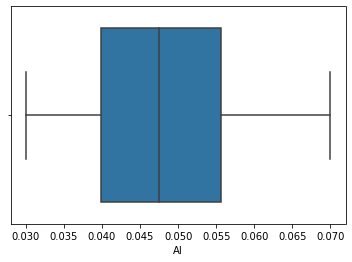

Ti


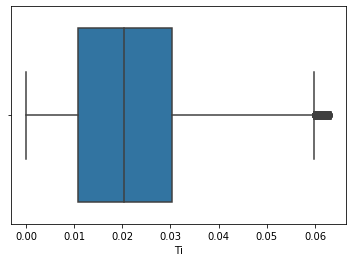

Cr


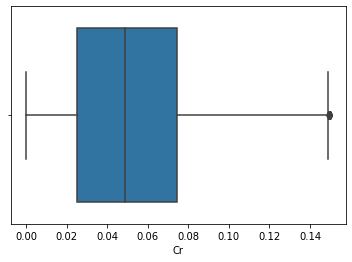

Co


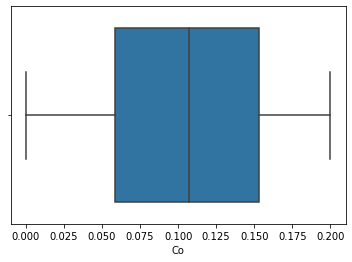

Mo


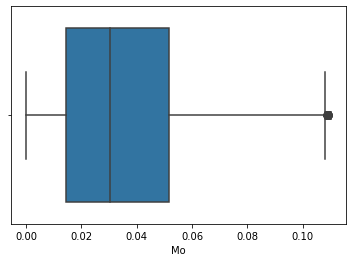

Ru


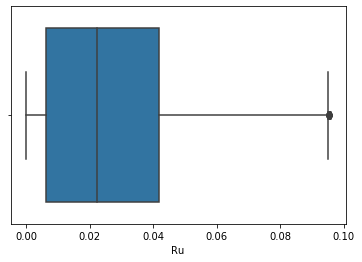

Ta


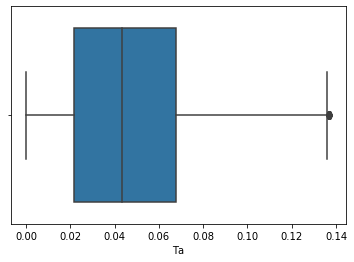

W


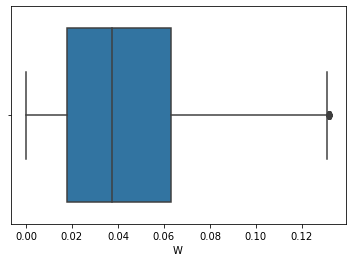

Re


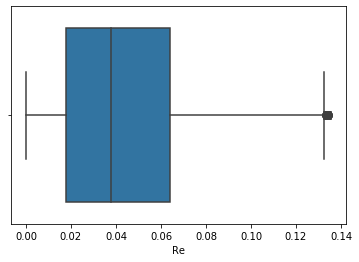

Al_var


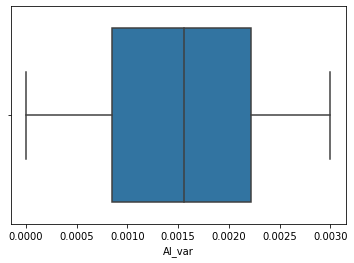

Ti_var


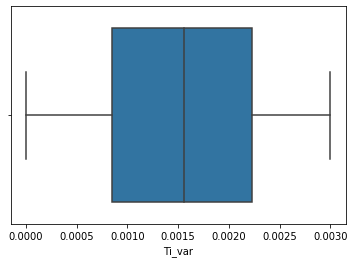

Cr_var


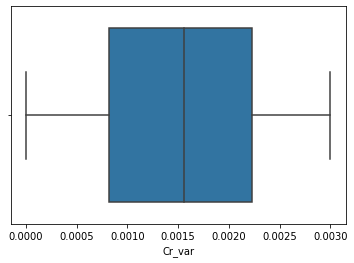

Co_var


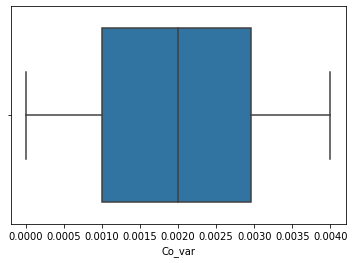

Mo_var


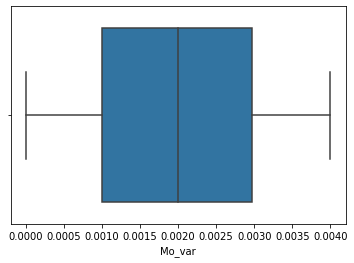

Ru_var


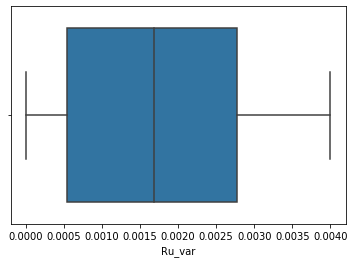

Ta_var


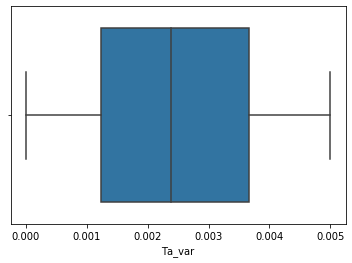

W_var


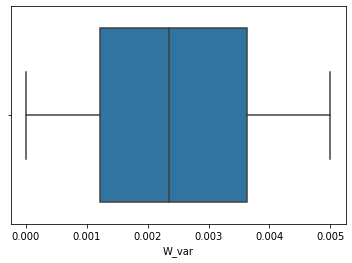

Re_var


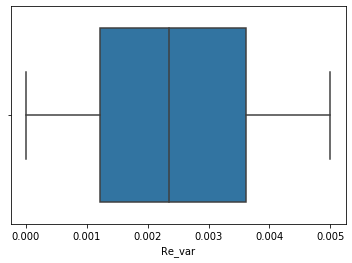

T


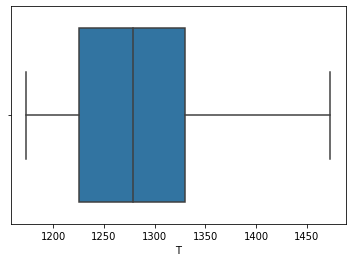

P_TCAPI_GammaPrimePhaseFractionMain_value


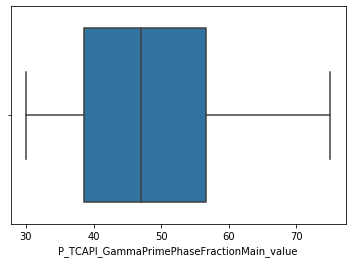

P_TCAPI_SolidusTemperatureMain_value


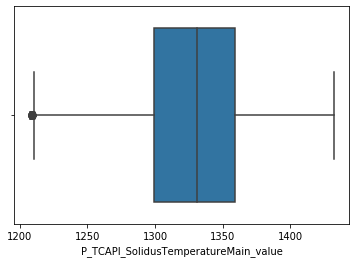

P_TCAPI_LiquidusTemperatureMain_value


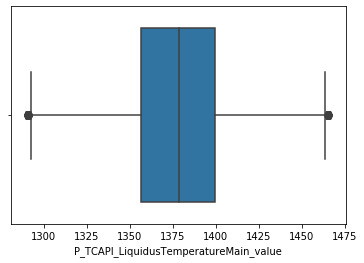

P_TCAPI_Density_CaronMain_value


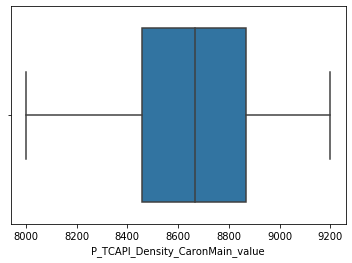

In [76]:
for col_name in df.columns:
    print(col_name)
    sns.boxplot(df[col_name])
    plt.show()

In [77]:
df.head()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,...,Mo_var,Ru_var,Ta_var,W_var,Re_var,T,P_TCAPI_GammaPrimePhaseFractionMain_value,P_TCAPI_SolidusTemperatureMain_value,P_TCAPI_LiquidusTemperatureMain_value,P_TCAPI_Density_CaronMain_value
0,0.030004,0.034982,0.060390,0.179354,0.004069,0.070098,0.033860,0.018508,0.070210,0.002396,...,0.000191,0.001678,0.004871,0.004565,0.004747,1274.450089,30.776242,1329.063527,1390.850579,8687.461852
1,0.030007,0.033043,0.049549,0.152138,0.045881,0.041942,0.024419,0.063190,0.013271,0.003000,...,0.001000,0.002000,0.002000,0.002000,0.001000,1188.879240,38.051605,1331.448294,1378.137130,8616.105462
2,0.030010,0.025279,0.042238,0.048914,0.086289,0.023597,0.064696,0.023875,0.052492,0.001978,...,0.001181,0.002562,0.003372,0.004824,0.003075,1231.177894,38.014655,1330.248589,1377.186752,8915.481419
3,0.030010,0.028758,0.117597,0.129213,0.013396,0.081975,0.043861,0.105330,0.004558,0.002228,...,0.001827,0.002841,0.002321,0.003077,0.002766,1295.155371,34.460291,1257.819936,1338.662203,8873.510816
4,0.030011,0.055962,0.022606,0.096740,0.089257,0.016347,0.025636,0.030560,0.041867,0.002470,...,0.002601,0.001075,0.003116,0.001902,0.003975,1375.811214,35.945177,1295.418620,1349.375554,8611.575596


In [79]:
df.shape

(54836, 23)

### 2.2 Modifying Data for Supervised Learning Method

The task is to find a mapping funcion between the input data X and the corresponding mapping value/target y

In [80]:
df.columns

Index(['Al', 'Ti', 'Cr', 'Co', 'Mo', 'Ru', 'Ta', 'W', 'Re', 'Al_var', 'Ti_var',
       'Cr_var', 'Co_var', 'Mo_var', 'Ru_var', 'Ta_var', 'W_var', 'Re_var',
       'T', 'P_TCAPI_GammaPrimePhaseFractionMain_value',
       'P_TCAPI_SolidusTemperatureMain_value',
       'P_TCAPI_LiquidusTemperatureMain_value',
       'P_TCAPI_Density_CaronMain_value'],
      dtype='object')

In [81]:
X = df[['Al', 'Ti', 'Cr', 'Co', 'Mo', 'Ru', 'Ta', 'W', 'Re', 
       'Al_var', 'Ti_var', 'Cr_var', 'Co_var', 'Mo_var', 'Ru_var',
       'Ta_var', 'W_var', 'Re_var', 'T']]

In [82]:
y = df['P_TCAPI_GammaPrimePhaseFractionMain_value']

In [83]:
X.head()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,Ti_var,Cr_var,Co_var,Mo_var,Ru_var,Ta_var,W_var,Re_var,T
0,0.030004,0.034982,0.060390,0.179354,0.004069,0.070098,0.033860,0.018508,0.070210,0.002396,0.002979,0.000188,0.001446,0.000191,0.001678,0.004871,0.004565,0.004747,1274.450089
1,0.030007,0.033043,0.049549,0.152138,0.045881,0.041942,0.024419,0.063190,0.013271,0.003000,0.001000,0.002000,0.002000,0.001000,0.002000,0.002000,0.002000,0.001000,1188.879240
2,0.030010,0.025279,0.042238,0.048914,0.086289,0.023597,0.064696,0.023875,0.052492,0.001978,0.001122,0.002402,0.000798,0.001181,0.002562,0.003372,0.004824,0.003075,1231.177894
3,0.030010,0.028758,0.117597,0.129213,0.013396,0.081975,0.043861,0.105330,0.004558,0.002228,0.000475,0.001096,0.002758,0.001827,0.002841,0.002321,0.003077,0.002766,1295.155371
4,0.030011,0.055962,0.022606,0.096740,0.089257,0.016347,0.025636,0.030560,0.041867,0.002470,0.001493,0.000331,0.000549,0.002601,0.001075,0.003116,0.001902,0.003975,1375.811214


In [84]:
X.describe()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,Ti_var,Cr_var,Co_var,Mo_var,Ru_var,Ta_var,W_var,Re_var,T
count,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000
mean,0.047986,0.022467,0.050793,0.105137,0.035150,0.025991,0.045739,0.042104,0.043301,0.001537,0.001540,0.001532,0.001983,0.001987,0.001692,0.002463,0.002443,0.002443,1280.333281
std,0.010067,0.014946,0.030838,0.055965,0.025349,0.021833,0.028317,0.029030,0.030493,0.000842,0.000849,0.000856,0.001125,0.001126,0.001252,0.001411,0.001407,0.001403,64.266314
min,0.030004,0.000002,0.000002,0.000010,0.000000,0.000000,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1173.156104
25%,0.039845,0.010710,0.025064,0.058452,0.014298,0.006283,0.021894,0.017655,0.018015,0.000850,0.000849,0.000824,0.001000,0.001000,0.000535,0.001234,0.001217,0.001218,1225.774592
50%,0.047449,0.020377,0.048980,0.107465,0.030374,0.022416,0.043296,0.037497,0.037886,0.001557,0.001563,0.001556,0.002000,0.002000,0.001688,0.002384,0.002346,0.002355,1279.004976
75%,0.055616,0.030336,0.074664,0.153237,0.051806,0.041765,0.067571,0.063034,0.063806,0.002216,0.002233,0.002230,0.002962,0.002971,0.002778,0.003666,0.003629,0.003622,1330.369153
max,0.069999,0.063180,0.149976,0.199999,0.109901,0.095733,0.137402,0.132324,0.135233,0.003000,0.003000,0.003000,0.004000,0.004000,0.004000,0.005000,0.005000,0.005000,1473.030978


In [85]:
l =X['T'].values

Al


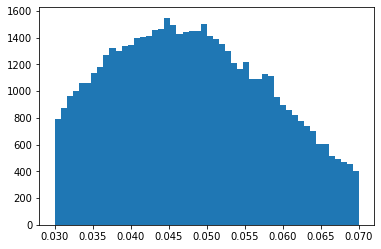

Ti


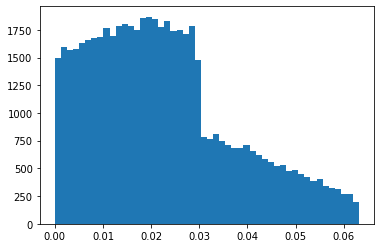

Cr


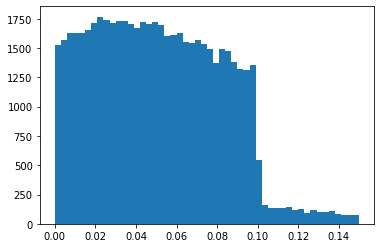

Co


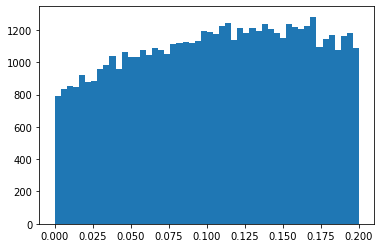

Mo


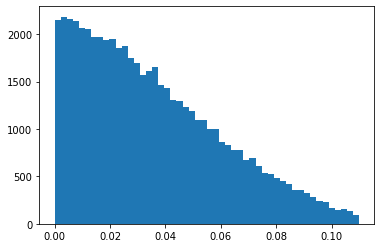

Ru


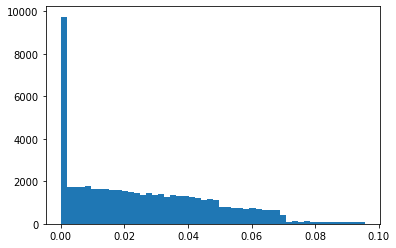

Ta


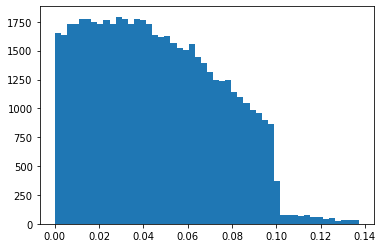

W


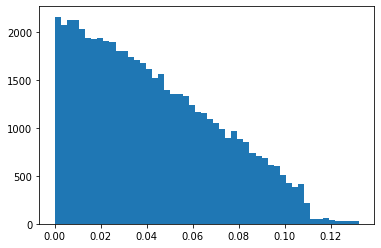

Re


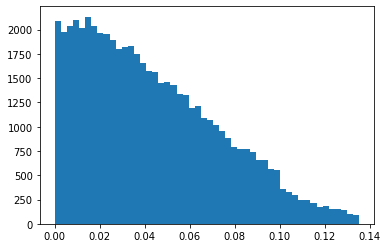

Al_var


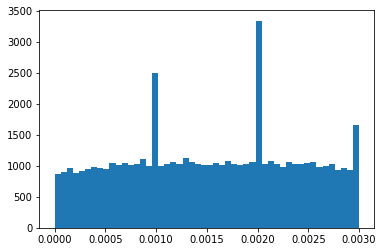

Ti_var


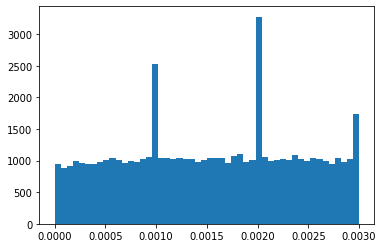

Cr_var


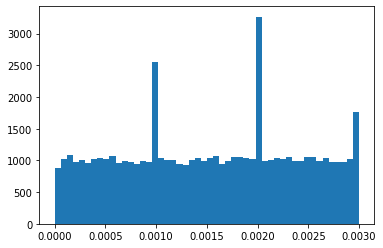

Co_var


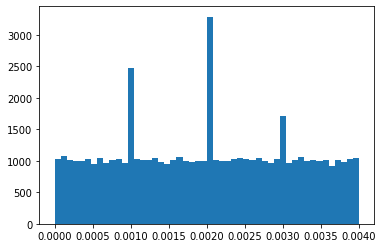

Mo_var


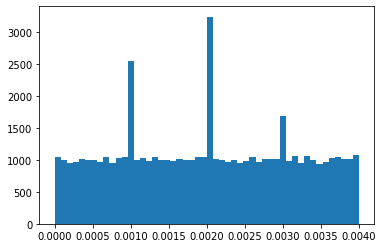

Ru_var


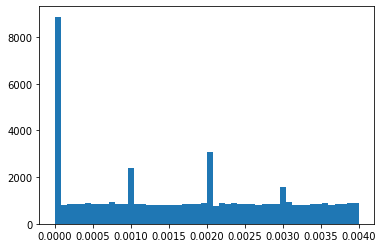

Ta_var


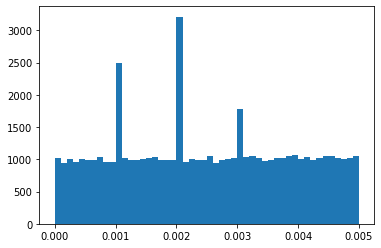

W_var


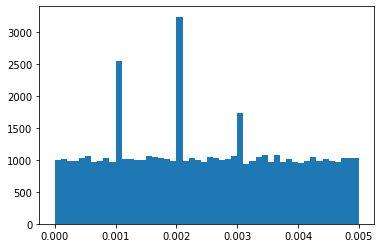

Re_var


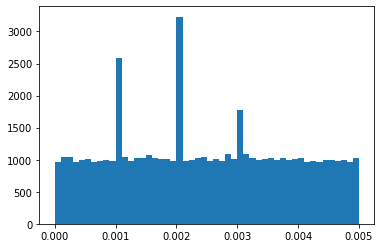

T


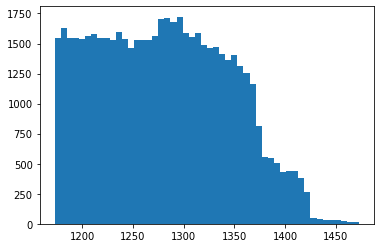

In [86]:
for col in X.columns:
    print(col)
    plt.hist(df[col],50)
    plt.show()

Note that all teh variables execpt 'T' are in range '0-1'. This might be problem for the algorithm. so we rescale the temperature data to lie between '0-1'. this is called as feature scaling.

**Standersising data** 

1. MinMaxScaler:  $x_{new} = \frac{x_{old}-x_{min}}{x_{max}-x_{min}}$


2. Standard Scaler:  $x_{new} = \frac{x_{old}-\mu }{\sigma }$


### 2.3 Standerdising the Input variables

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [88]:
Standard_T = StandardScaler().fit_transform(X[['T']])
MinMax_T = MinMaxScaler().fit_transform(X[['T']])

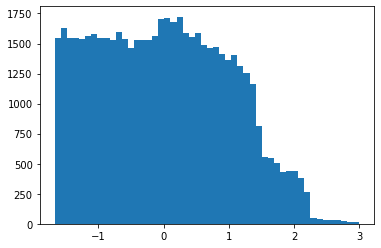

In [89]:
plt.hist(Standard_T,50);

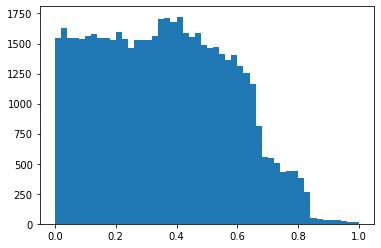

In [90]:
plt.hist(MinMax_T,50);

In [91]:
X_scaled = X.copy()

In [92]:
X_scaled["T"] = MinMaxScaler().fit_transform(X[['T']])

In [93]:
X_scaled.describe()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,Ti_var,Cr_var,Co_var,Mo_var,Ru_var,Ta_var,W_var,Re_var,T
count,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000,54836.000000
mean,0.047986,0.022467,0.050793,0.105137,0.035150,0.025991,0.045739,0.042104,0.043301,0.001537,0.001540,0.001532,0.001983,0.001987,0.001692,0.002463,0.002443,0.002443,0.357406
std,0.010067,0.014946,0.030838,0.055965,0.025349,0.021833,0.028317,0.029030,0.030493,0.000842,0.000849,0.000856,0.001125,0.001126,0.001252,0.001411,0.001407,0.001403,0.214310
min,0.030004,0.000002,0.000002,0.000010,0.000000,0.000000,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039845,0.010710,0.025064,0.058452,0.014298,0.006283,0.021894,0.017655,0.018015,0.000850,0.000849,0.000824,0.001000,0.001000,0.000535,0.001234,0.001217,0.001218,0.175468
50%,0.047449,0.020377,0.048980,0.107465,0.030374,0.022416,0.043296,0.037497,0.037886,0.001557,0.001563,0.001556,0.002000,0.002000,0.001688,0.002384,0.002346,0.002355,0.352977
75%,0.055616,0.030336,0.074664,0.153237,0.051806,0.041765,0.067571,0.063034,0.063806,0.002216,0.002233,0.002230,0.002962,0.002971,0.002778,0.003666,0.003629,0.003622,0.524262
max,0.069999,0.063180,0.149976,0.199999,0.109901,0.095733,0.137402,0.132324,0.135233,0.003000,0.003000,0.003000,0.004000,0.004000,0.004000,0.005000,0.005000,0.005000,1.000000


### 2.4 Splitting Data for Trining and Testing

1. split 75% data as training and the rest for testing
2. Shuffle all the data before splitting the data
3. Random state=42 to make sure that the random shuffling gives same values everytime we run the code (Number 42 has nothing to do with the current operation.)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.75,
                                                random_state=42, shuffle=True)

In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41127, 19)
(13709, 19)
(41127,)
(13709,)


## 3. Model Evaluation strategies

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Function to evaluate the model performacne

In [99]:
def my_scorer(regressor,X_train,X_test,y_train,y_test):
    """ 
    Returns the model evaluation metrics MSE,MAE,R2 values based on 
     the model predictions seprately for both training and test data
    
    Parameters:
    ----------------------------------------------
    regressor: trained model
    X_train: Input data from Training set
    X_test: Input data from test set
    y_train: Target value from training set
    y_test: target value for test set
    """
    # predicted values for training dataset
    pred_train = regressor.predict(X_train)
    
    #predicted calues for test dataset
    pred_test = regressor.predict(X_test)
    
    # Performance metrics of model prediction on training data
    print('training Data')
    print('MSE: ',mean_squared_error(y_train,pred_train))
    print('MAE: ',mean_absolute_error(y_train,pred_train))
    print('R2: ',r2_score(y_train,pred_train))
    
    # Performance metrics of model prediction on test data
    print('test Data')
    print('MSE: ',mean_squared_error(y_test,pred_test))
    print('MAE: ',mean_absolute_error(y_test,pred_test))
    print('R2: ',r2_score(y_test,pred_test))
    
    # graphical overview
    #training data
    plt.scatter(y_train,pred_train,label='train',color='blue',alpha=0.1)
    #test data
    plt.scatter(y_test,pred_test,label='train',color='black',alpha=0.1)
    #straightline plot with slope 1 (Ideal condition)
    plt.plot([30,80],[30,80],color='red')
    plt.show()
    

## 4. Machine Learning Algorithms

### 4.1 Linear Regression

1. To understand what is Linear regression and how ot works watch the following video.
https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU

Fittig the data to the best line. 
1. Calculate the sum of the squared residuals between the straingh line and the individual data points. 
2. $y= W*x+b $. 
we want to find w,b so that the residul´is minum 
 
 Hoe to find these values?
Ans:  Take the derivative of the residual and equal to zero 

In [100]:
from sklearn.linear_model import LinearRegression

#### Initiate Model

In [101]:
lr = LinearRegression()

#### fit the training data

In [102]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model evaluation

training Data
MSE:  14.345449525155455
MAE:  2.7596506924890285
R2:  0.8887657760686862
test Data
MSE:  13.920606376883338
MAE:  2.7270939617844054
R2:  0.8916927128381842


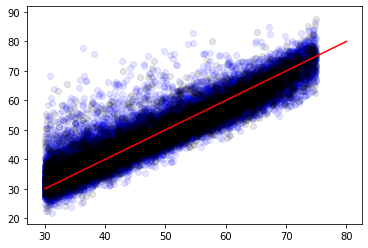

In [104]:
my_scorer(lr,X_train,X_test,y_train,y_test)

#### Model parameters

In [106]:
# all the coefficents for each feature in input data
lr.coef_

array([1410.22001964,  896.19400606,    8.23012886,  -16.32644956,
         81.99197389,   26.3611677 ,  286.93761135,  142.68925007,
         78.06365027,    9.91992064,   14.62090725,  -26.86098566,
        -21.13123297,   -2.75847026,  -62.04328485,  -15.31528202,
          8.9835621 ,   -2.94764302,  -35.3056685 ])

In [107]:
# intercept
lr.intercept_

-51.65186327500821

#### Feature Importance

In [112]:
Feature_imp_df = pd.DataFrame({'coeff': lr.coef_, 'label':X_scaled.columns}).sort_values('coeff', ascending=False)
Feature_imp_df

,coeff,label
0,1410.220020,Al
1,896.194006,Ti
6,286.937611,Ta
7,142.689250,W
4,81.991974,Mo
8,78.063650,Re
5,26.361168,Ru
10,14.620907,Ti_var
9,9.919921,Al_var
16,8.983562,W_var


This shows that a small change 1% in Al concentration results in changes in $\gamma^\prime$ phase by 14 % according to the linear model

### 4.2 Feed forward feature selection in Linear models

In [125]:
import statsmodels.formula.api as smf

In [116]:
def forward_selected(data, response):
    
    #https://planspace.org/20150423-forward_selection_with_statsmodels/
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            print("Added: ",best_candidate, " score: ",best_new_score)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [120]:
#add input and target value in same dataframe
train_df = pd.concat([X_train,y_train], axis=1)

In [121]:
train_df.head()

,Al,Ti,Cr,Co,Mo,Ru,Ta,W,Re,Al_var,Ti_var,Cr_var,Co_var,Mo_var,Ru_var,Ta_var,W_var,Re_var,T,P_TCAPI_GammaPrimePhaseFractionMain_value
50137,0.060547,0.012682,0.084460,0.048224,0.042353,0.058508,0.040234,0.000458,0.079125,0.002882,0.002734,0.002212,0.002497,0.000676,0.002070,0.001130,0.001150,0.000763,0.733941,31.185560
15474,0.040146,0.008659,0.069874,0.080434,0.067020,0.063126,0.048066,0.042727,0.047854,0.002610,0.002603,0.000802,0.003901,0.001495,0.001523,0.004725,0.002094,0.001175,0.228048,35.727170
48622,0.059247,0.027247,0.010633,0.064849,0.055360,0.007636,0.044177,0.000829,0.015314,0.001696,0.002689,0.002476,0.001616,0.002702,0.000120,0.001928,0.003900,0.002795,0.287584,66.829394
7724,0.035674,0.025620,0.083043,0.146986,0.031836,0.048328,0.085231,0.041399,0.016570,0.001704,0.000061,0.000538,0.001216,0.000698,0.000717,0.003841,0.001666,0.003584,0.286607,49.317963
10033,0.037077,0.037497,0.078957,0.112572,0.036268,0.039332,0.078413,0.019691,0.061133,0.000642,0.000978,0.002039,0.000437,0.000675,0.003940,0.004654,0.001374,0.000520,0.460442,56.014003


In [123]:
# create model
model = forward_selected(train_df,'P_TCAPI_GammaPrimePhaseFractionMain_value')

Added:  Al  score:  0.15138099234539637
Added:  Ti  score:  0.3658385173539539
Added:  T  score:  0.5545664871493321
Added:  Ta  score:  0.7913535609208053
Added:  W  score:  0.8494609424317944
Added:  Re  score:  0.8624802955395987
Added:  Mo  score:  0.8796298890355927
Added:  Co  score:  0.8860815566296772
Added:  Ru  score:  0.8882156175382551
Added:  Cr  score:  0.8886810779108618
Added:  Ru_var  score:  0.8887207964855618
Added:  Co_var  score:  0.8887225057465346
Added:  Cr_var  score:  0.8887237890807749
Added:  Ta_var  score:  0.8887248851140497


In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     P_TCAPI_GammaPrimePhaseFractionMain_value   R-squared:                       0.889
Model:                                                   OLS   Adj. R-squared:                  0.889
Method:                                        Least Squares   F-statistic:                 2.346e+04
Date:                                       Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                                               20:57:56   Log-Likelihood:            -1.1313e+05
No. Observations:                                      41127   AIC:                         2.263e+05
Df Residuals:                                          41112   BIC:                         2.264e+05
Df Model:                                                 14                                         
Covariance Type:                                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.6074      0.262   -196.799      0.000     -52.121     -51.093
Al          1410.2522      2.903    485.751      0.000    1404.562    1415.943
Ti           896.2125      1.957    458.040      0.000     892.377     900.048
T            -35.3079      0.100   -352.410      0.000     -35.504     -35.112
Ta           286.9421      0.845    339.680      0.000     285.286     288.598
W            142.6924      0.779    183.284      0.000     141.166     144.218
Re            78.0575      0.749    104.170      0.000      76.589      79.526
Mo            81.9943      0.958     85.593      0.000      80.117      83.872
Co           -16.3214      0.335    -48.656      0.000     -16.979     -15.664
Ru            26.3614      0.927     28.435      0.000      24.544      28.179
Cr             8.2491      0.626     13.180      0.000       7.022       9.476
Ru_var       -61.9406     15.687     -3.948      0.000     -92.688     -31.193
Co_var       -21.0488     16.616     -1.267      0.205     -53.617      11.520
Cr_var       -26.6363     21.811     -1.221      0.222     -69.386      16.114
Ta_var       -15.6747     13.224     -1.185      0.236     -41.594      10.245
==============================================================================
Omnibus:                    12182.865   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69825.938
Skew:                          -1.306   Prob(JB):                         0.00
Kurtosis:                       8.824   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.3 Decision Tree

https://www.youtube.com/watch?v=7VeUPuFGJHk
In general Decision tree asks a question and clasifies the data based on the answer

In [129]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO

In [138]:
# funcition to visualize the tree
def visualize_tree(dtree):
    dot_data = StringIO()
    export_graphviz(dtree,out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [139]:
from sklearn.tree import DecisionTreeRegressor

In [140]:
# initiate model 
decision_tree_regressor = DecisionTreeRegressor(max_depth=1)

In [141]:
# fit the data
decision_tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

training Data
MSE:  114.30596098296671
MAE:  8.926316132208807
R2:  0.11367469953678266
test Data
MSE:  114.24890678197504
MAE:  8.894478909647008
R2:  0.11110271925314708


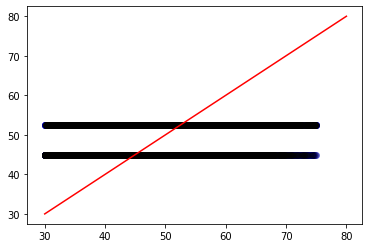

In [142]:
#evaluation
my_scorer(decision_tree_regressor,X_train, X_test, y_train,y_test)

In [143]:
visualize_tree(decision_tree_regressor)

InvocationException: GraphViz's executables not found

### Hyper parameters Adjustment

training Data
MSE:  88.10005007217248
MAE:  7.711394771974734
R2:  0.3168746172154693
test Data
MSE:  88.63119388283027
MAE:  7.709141122653672
R2:  0.31041767093543327


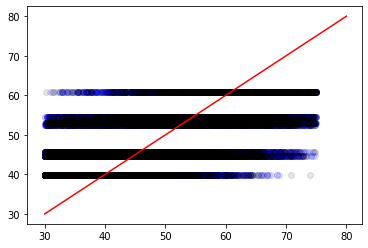

In [144]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=3)
# fit the data
decision_tree_regressor.fit(X_train,y_train)
#evaluation
my_scorer(decision_tree_regressor,X_train, X_test, y_train,y_test)

training Data
MSE:  22.84524688165673
MAE:  3.7573762395368275
R2:  0.8228585794440058
test Data
MSE:  34.421231287145595
MAE:  4.613473601571223
R2:  0.7321905324705525


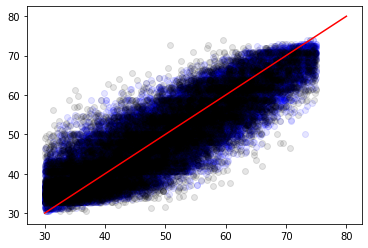

In [145]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=10)
# fit the data
decision_tree_regressor.fit(X_train,y_train)
#evaluation
my_scorer(decision_tree_regressor,X_train, X_test, y_train,y_test)

training Data
MSE:  2.6138364091730096e-11
MAE:  1.1975101514811475e-07
R2:  0.9999999999997973
test Data
MSE:  40.2493349468214
MAE:  4.924464415128748
R2:  0.6868458054099875


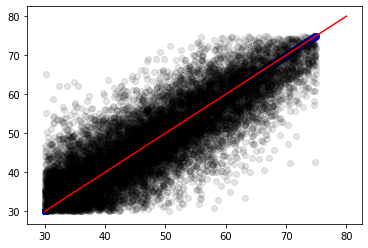

In [147]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=None)
# fit the data
decision_tree_regressor.fit(X_train,y_train)
#evaluation
my_scorer(decision_tree_regressor,X_train, X_test, y_train,y_test)

Training value of R2 is 1 but testing value is 0.68. This is overfitting. TO avoid overfitting we need to make some regularization

In [149]:
decision_tree_regressor.tree_.max_depth

29

#### Evaluating performance by changing the number of nodes

In [150]:
def train_test_r2_metrics(regressor):
    
    ''' 
    Returns the R2 score for training dataset and test dataset
    '''
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)#
    r2_train = r2_score(y_train,pred_train)
    r2_test = r2_score(y_test, pred_test)
    return r2_train,r2_test

In [153]:
max_depth_list = []
r2_train_list  = []
r2_test_list   = []

for max_depth in range(1,30):
    
    print('training with max depth: ', max_depth)
    decision_tree_regressor = DecisionTreeRegressor(max_depth=max_depth)
    # fit the data
    decision_tree_regressor.fit(X_train,y_train)
    #evaluation
    r2_train, r2_test = train_test_r2_metrics(decision_tree_regressor)
    
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    max_depth_list.append(max_depth)

training with max depth:  1
training with max depth:  2
training with max depth:  3
training with max depth:  4
training with max depth:  5
training with max depth:  6
training with max depth:  7
training with max depth:  8
training with max depth:  9
training with max depth:  10
training with max depth:  11
training with max depth:  12
training with max depth:  13
training with max depth:  14
training with max depth:  15
training with max depth:  16
training with max depth:  17
training with max depth:  18
training with max depth:  19
training with max depth:  20
training with max depth:  21
training with max depth:  22
training with max depth:  23
training with max depth:  24
training with max depth:  25
training with max depth:  26
training with max depth:  27
training with max depth:  28
training with max depth:  29


### Model performance with Hyper parameter tuning

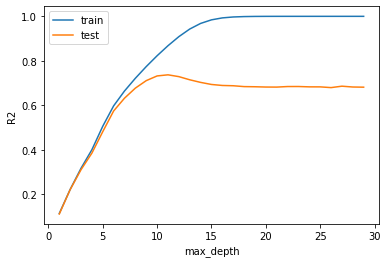

In [154]:
plt.plot(max_depth_list,r2_train_list,label='train')
plt.plot(max_depth_list,r2_test_list,label='test')
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.legend()
plt.show()

The best value of R2 on test data is for tree with depth 11. 

#### Plotting the best model in decision tree

training Data
MSE:  17.036072960132135
MAE:  3.2035205021345527
R2:  0.8679027554183945
test Data
MSE:  33.73805763804972
MAE:  4.518568884978429
R2:  0.7375058673482692


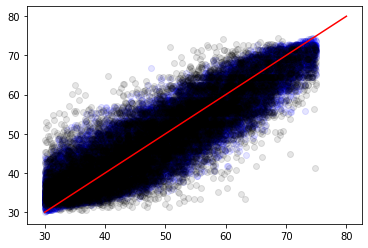

In [155]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=11)
# fit the data
decision_tree_regressor.fit(X_train,y_train)
#evaluation
my_scorer(decision_tree_regressor,X_train, X_test, y_train,y_test)

Decision tree makes splits that maximize the decrease in impurity. By calculating the mean distance in impurity for each feaure we can understand that feature's importance

###  Looking at feature Importance

In [156]:
decision_tree_regressor.feature_importances_

array([0.29959507, 0.2645695 , 0.01586028, 0.00587605, 0.00462739,
       0.00101231, 0.15461135, 0.04063736, 0.0023685 , 0.00117115,
       0.0005298 , 0.00117249, 0.00101756, 0.0009349 , 0.00092819,
       0.00075947, 0.00087898, 0.00087083, 0.20257882])

In [158]:
pd.DataFrame({'cols':X_train.columns, 'feature_imp': decision_tree_regressor.feature_importances_}).sort_values('feature_imp',ascending=False)

,cols,feature_imp
0,Al,0.299595
1,Ti,0.264569
18,T,0.202579
6,Ta,0.154611
7,W,0.040637
2,Cr,0.015860
3,Co,0.005876
4,Mo,0.004627
8,Re,0.002368
11,Cr_var,0.001172


### 4.4 Random forest: Ensamble methods

Ensamble methods combines the prediction of weak learner (one descion tree with small max_depth)

In [159]:
from sklearn.ensemble import RandomForestRegressor

Ranforest fits a number of descion tree on various sub-samples (if bootstrapping is used) of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

How random forest works?
1. Boot strapping: Randomly select the samples from the dataset (wit replacement possible)

2. Create a descion tree using bootstrapped dataset but only use a random subset of features of input data at each step.

3. Repeat: make new bootstrap dataset and build another descion tree sonsidering the subset of variables each step. Like this prepare many decision strees DC1, DCT2,...DCTn

4. Aggregation: Take a sngle data point and give it as input to all trees. Agregate the prediction made by the individual trees DCT1_prediction,...,DCTn_prediction and then agregate the answer from all the trees and return it as the output predicted value of the random forest algorithem.


**Bootstrapping the data and also aggregatting to make descisions is called Bagging**

**Bootstapping helps that 1/3 dataset is not used for training**

training Data
MSE:  17.002328885613107
MAE:  3.1836405662167127
R2:  0.8681644060508702
test Data
MSE:  28.09251907153923
MAE:  4.16638524603412
R2:  0.7814301728096706


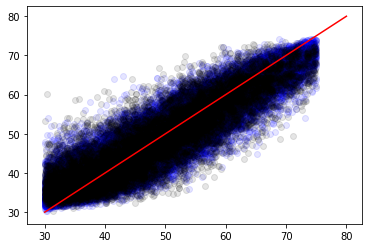

In [161]:
random_forest = RandomForestRegressor(n_estimators=2,max_depth=11,
                                      bootstrap=True, random_state=42)

random_forest.fit(X_train,y_train)

my_scorer(random_forest,X_train,X_test,y_train,y_test)

### Hyper parameter tuning for Random forest

training Data
MSE:  2.3203583042083142
MAE:  1.1864545966496265
R2:  0.9820080050640034
test Data
MSE:  15.452527551791144
MAE:  3.1070256610127616
R2:  0.8797738192132964


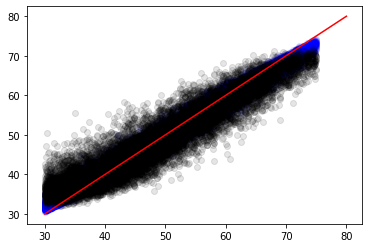

In [162]:
random_forest = RandomForestRegressor(n_estimators=50,
                                      bootstrap=True, random_state=42)

random_forest.fit(X_train,y_train)

my_scorer(random_forest,X_train,X_test,y_train,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   29.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.2s finished


training Data
MSE:  2.1465095056279258
MAE:  1.1522535447082132
R2:  0.9833560239014453
test Data
MSE:  15.038487839296584
MAE:  3.067566883446209
R2:  0.8829951959855046


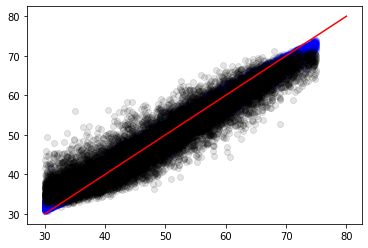

In [164]:
random_forest = RandomForestRegressor(n_estimators=120,
                                      bootstrap=True, random_state=42,
                                     n_jobs=-1, verbose=1)

random_forest.fit(X_train,y_train)

my_scorer(random_forest,X_train,X_test,y_train,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


training Data
MSE:  2.1465095056279258
MAE:  1.1522535447082132
R2:  0.9833560239014453
test Data
MSE:  15.038487839296586
MAE:  3.067566883446209
R2:  0.8829951959855046


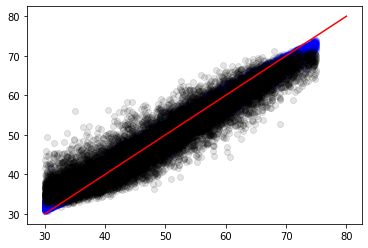

In [165]:
random_forest = RandomForestRegressor(n_estimators=120,
                                      bootstrap=True, random_state=42,
                                     n_jobs=1, verbose=1)

random_forest.fit(X_train,y_train)

my_scorer(random_forest,X_train,X_test,y_train,y_test)

### 4.5 Gradient Boosting

In [166]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient boosting builds an additive model in a forwarded stage-wise fashin, it allows for the optimization of arbitary differentiable loss functions. In each stage a regression tree is fit on the nagative gradient of the given loss function

training Data
MSE:  90.2291331100998
MAE:  8.014937655316551
R2:  0.3003657654716546
test Data
MSE:  93.36512187312593
MAE:  8.15678068653296
R2:  0.273586021194964


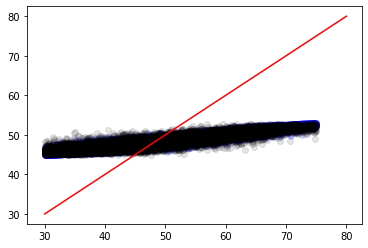

In [168]:
gbr = GradientBoostingRegressor(n_estimators=2, max_depth=11)
gbr.fit(X_train,y_train)
my_scorer(gbr,X_train,X_test,y_train,y_test)

training Data
MSE:  0.5434940796434629
MAE:  0.578744276211483
R2:  0.9957857617459535
test Data
MSE:  9.452138560615431
MAE:  2.398112495055388
R2:  0.9264589876574723


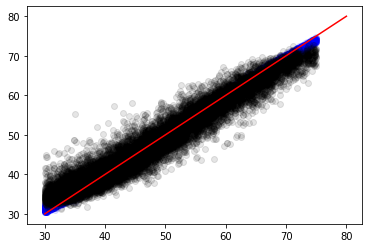

In [169]:
gbr = GradientBoostingRegressor(n_estimators=50, max_depth=11)
gbr.fit(X_train,y_train)
my_scorer(gbr,X_train,X_test,y_train,y_test)

#### Feature importance oin Gradient Boosting

In [170]:
pd.DataFrame({'cols':X_train.columns, 'feature_imp': gbr.feature_importances_}).sort_values('feature_imp',ascending=False)

,cols,feature_imp
0,Al,0.273206
1,Ti,0.239648
18,T,0.195572
6,Ta,0.155910
7,W,0.053917
2,Cr,0.026309
3,Co,0.014245
4,Mo,0.013025
8,Re,0.011037
5,Ru,0.001887


### 4.6 Multi layer Perceptron

MLP regressor optimizes the squared loss using stochastic gradient descent

In [173]:
from sklearn.neural_network import MLPRegressor

C:\Users\Navyanth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training Data
MSE:  14.256472817138322
MAE:  2.755671122833188
R2:  0.8894556990332398
test Data
MSE:  13.876876968226176
MAE:  2.7274723065059376
R2:  0.8920329432486003


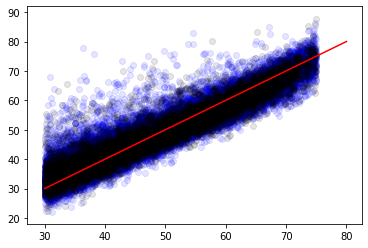

In [175]:
#simple model with 10 neurons in hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(10,))
mlp.fit(X_train,y_train)
my_scorer(mlp,X_train,X_test,y_train,y_test)

Need to minimize the training error further

#### hyper paramenter tuning

training Data
MSE:  14.365077722963191
MAE:  2.7649693151384107
R2:  0.8886135795588115
test Data
MSE:  13.943944550371464
MAE:  2.7307109838192902
R2:  0.8915111335168977


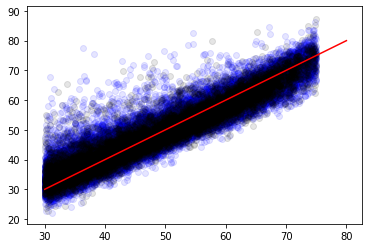

In [178]:
#adding more neurons
mlp = MLPRegressor(hidden_layer_sizes=(20,),early_stopping=True)
mlp.fit(X_train,y_train)
my_scorer(mlp,X_train,X_test,y_train,y_test)

C:\Users\Navyanth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training Data
MSE:  3.2559150156525916
MAE:  1.2608987842260828
R2:  0.9747537238678129
test Data
MSE:  3.201180474904127
MAE:  1.2527335325421642
R2:  0.975093673108379


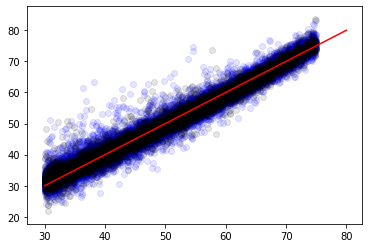

In [182]:
#adding more neurons
mlp = MLPRegressor(hidden_layer_sizes=(100,),early_stopping=True)
mlp.fit(X_train,y_train)
my_scorer(mlp,X_train,X_test,y_train,y_test)

training Data
MSE:  13.965916111413353
MAE:  2.7028247622743797
R2:  0.8917086677960996
test Data
MSE:  13.627446250596476
MAE:  2.6730227590362827
R2:  0.8939736032766116


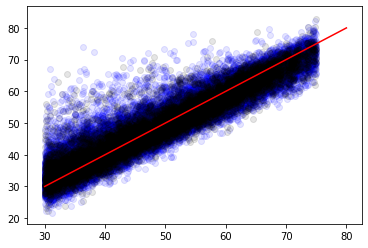

In [181]:
# adding more layers
mlp = MLPRegressor(hidden_layer_sizes=(10,10),early_stopping=True)
mlp.fit(X_train,y_train)
my_scorer(mlp,X_train,X_test,y_train,y_test)

## 4.7 Neural Networks in Keras

Keas is deep learning library based on python and runs on Tensorflow backend to run the calculations

In [186]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#### Building the model

In [191]:
#initiate model
nn = Sequential()

#add first layer
nn.add(Dense(input_shape=(X_train.shape[1],),units=200,activation='tanh'))

#add second layer 
nn.add(Dense(units=100,activation='tanh'))

#add final layer
nn.add(Dense(units=1,activation='linear'))

#### compiling the model

In [193]:
nn.compile(optimizer='adam', loss='mean_squared_error')

In [194]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 24,201
Trainable params: 24,201
Non-trainable params: 0
_________________________________________________________________


#### Fitting the data
Use 25% training data for validation.

Use earlystopping to stop the training after few eopchs to avoid overfiting

In [195]:
from keras.callbacks import EarlyStopping

In [198]:
#earl stopping if no imrovent is observed in the previous 10 epochs
e_stop = EarlyStopping(patience=40)

In [203]:
#fitting data
nn.fit(x=X_train,y=y_train,batch_size=1024,epochs=500,
       verbose=2,callbacks=[e_stop],validation_split=0.25)

Train on 30845 samples, validate on 10282 samples
Epoch 1/500
 - 0s - loss: 0.2387 - val_loss: 0.2482
Epoch 2/500
 - 0s - loss: 0.2148 - val_loss: 0.2428
Epoch 3/500
 - 0s - loss: 0.2148 - val_loss: 0.2859
Epoch 4/500
 - 0s - loss: 0.2160 - val_loss: 0.2485
Epoch 5/500
 - 0s - loss: 0.2099 - val_loss: 0.2482
Epoch 6/500
 - 0s - loss: 0.2081 - val_loss: 0.2385
Epoch 7/500
 - 0s - loss: 0.2077 - val_loss: 0.2385
Epoch 8/500
 - 0s - loss: 0.2054 - val_loss: 0.2512
Epoch 9/500
 - 0s - loss: 0.2148 - val_loss: 0.2612
Epoch 10/500
 - 0s - loss: 0.2307 - val_loss: 0.2466
Epoch 11/500
 - 0s - loss: 0.2181 - val_loss: 0.2340
Epoch 12/500
 - 0s - loss: 0.2117 - val_loss: 0.2935
Epoch 13/500
 - 0s - loss: 0.2246 - val_loss: 0.2943
Epoch 14/500
 - 0s - loss: 0.2171 - val_loss: 0.3058
Epoch 15/500
 - 0s - loss: 0.2143 - val_loss: 0.2308
Epoch 16/500
 - 0s - loss: 0.2099 - val_loss: 0.2455
Epoch 17/500
 - 0s - loss: 0.2078 - val_loss: 0.2672
Epoch 18/500
 - 0s - loss: 0.2164 - val_loss: 0.2382
Epoch

Epoch 154/500
 - 0s - loss: 0.1454 - val_loss: 0.1718
Epoch 155/500
 - 0s - loss: 0.1518 - val_loss: 0.1628
Epoch 156/500
 - 0s - loss: 0.1404 - val_loss: 0.2043
Epoch 157/500
 - 0s - loss: 0.1483 - val_loss: 0.2577
Epoch 158/500
 - 0s - loss: 0.1642 - val_loss: 0.1605
Epoch 159/500
 - 0s - loss: 0.1405 - val_loss: 0.1674
Epoch 160/500
 - 0s - loss: 0.1379 - val_loss: 0.1622
Epoch 161/500
 - 0s - loss: 0.1401 - val_loss: 0.2047
Epoch 162/500
 - 0s - loss: 0.1425 - val_loss: 0.1668
Epoch 163/500
 - 0s - loss: 0.1333 - val_loss: 0.1758
Epoch 164/500
 - 0s - loss: 0.1465 - val_loss: 0.1682
Epoch 165/500
 - 0s - loss: 0.1459 - val_loss: 0.1852
Epoch 166/500
 - 0s - loss: 0.1530 - val_loss: 0.1672
Epoch 167/500
 - 0s - loss: 0.1470 - val_loss: 0.1939
Epoch 168/500
 - 0s - loss: 0.1463 - val_loss: 0.1578
Epoch 169/500
 - 0s - loss: 0.1318 - val_loss: 0.1775
Epoch 170/500
 - 0s - loss: 0.1397 - val_loss: 0.1735
Epoch 171/500
 - 0s - loss: 0.1392 - val_loss: 0.2231
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1124 - val_loss: 0.1434
Epoch 307/500
 - 0s - loss: 0.1168 - val_loss: 0.1561
Epoch 308/500
 - 0s - loss: 0.1108 - val_loss: 0.1321
Epoch 309/500
 - 0s - loss: 0.1261 - val_loss: 0.1440
Epoch 310/500
 - 0s - loss: 0.1119 - val_loss: 0.1898
Epoch 311/500
 - 0s - loss: 0.1347 - val_loss: 0.1412
Epoch 312/500
 - 0s - loss: 0.1088 - val_loss: 0.1515
Epoch 313/500
 - 0s - loss: 0.1108 - val_loss: 0.1498
Epoch 314/500
 - 0s - loss: 0.1087 - val_loss: 0.1323
Epoch 315/500
 - 0s - loss: 0.1060 - val_loss: 0.1315
Epoch 316/500
 - 0s - loss: 0.1102 - val_loss: 0.1510
Epoch 317/500
 - 0s - loss: 0.1427 - val_loss: 0.1364
Epoch 318/500
 - 0s - loss: 0.1029 - val_loss: 0.1289
Epoch 319/500
 - 0s - loss: 0.1081 - val_loss: 0.1327
Epoch 320/500
 - 0s - loss: 0.1225 - val_loss: 0.1302
Epoch 321/500
 - 0s - loss: 0.1132 - val_loss: 0.1334
Epoch 322/500
 - 0s - loss: 0.1124 - val_loss: 0.2336
Epoch 323/500
 - 0s - loss: 0.1273 - val_loss: 0.1303
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1033 - val_loss: 0.1157
Epoch 459/500
 - 0s - loss: 0.1045 - val_loss: 0.1147
Epoch 460/500
 - 0s - loss: 0.0992 - val_loss: 0.1146
Epoch 461/500
 - 0s - loss: 0.1007 - val_loss: 0.2222
Epoch 462/500
 - 0s - loss: 0.1223 - val_loss: 0.1172
Epoch 463/500
 - 0s - loss: 0.0923 - val_loss: 0.1323
Epoch 464/500
 - 0s - loss: 0.1075 - val_loss: 0.2043
Epoch 465/500
 - 0s - loss: 0.1192 - val_loss: 0.1548
Epoch 466/500
 - 0s - loss: 0.1047 - val_loss: 0.1340
Epoch 467/500
 - 0s - loss: 0.0950 - val_loss: 0.1216
Epoch 468/500
 - 0s - loss: 0.1056 - val_loss: 0.1220
Epoch 469/500
 - 0s - loss: 0.0905 - val_loss: 0.1155
Epoch 470/500
 - 0s - loss: 0.0929 - val_loss: 0.1243
Epoch 471/500
 - 0s - loss: 0.0969 - val_loss: 0.1116
Epoch 472/500
 - 0s - loss: 0.0936 - val_loss: 0.1136
Epoch 473/500
 - 0s - loss: 0.0950 - val_loss: 0.1122
Epoch 474/500
 - 0s - loss: 0.0917 - val_loss: 0.1154
Epoch 475/500
 - 0s - loss: 0.0898 - val_loss: 0.1146
Epoch 476/500
 - 0s - loss: 

training Data
MSE:  0.09357773499136122
MAE:  0.1973794711404583
R2:  0.9992744007979143
test Data
MSE:  0.11586240659298384
MAE:  0.2042811162780143
R2:  0.9990985491147164


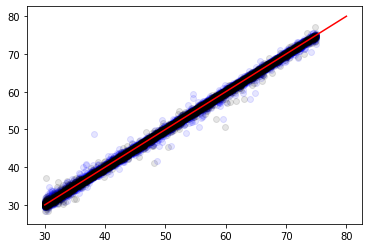

In [204]:
my_scorer(nn,X_train,X_test,y_train,y_test)